In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_excel(r"D:\ml\k_means\cust_data.xlsx", index_col=0)
raw_data.head() 

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
raw_data.shape

(30000, 37)

In [4]:
raw_data.size

1110000

In [5]:
raw_data.dtypes

Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal                     int64
Tommy Hilf

In [6]:
print(raw_data.shape)

(30000, 37)


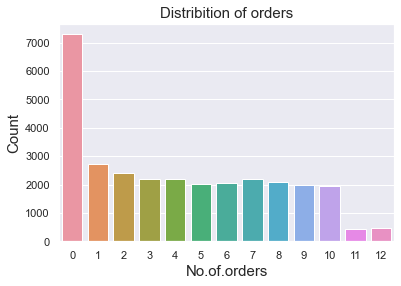

In [7]:
sns.countplot(data=raw_data, x="Orders")

plt.title("Distribition of orders", fontsize=15)
plt.xlabel("No.of.orders", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()

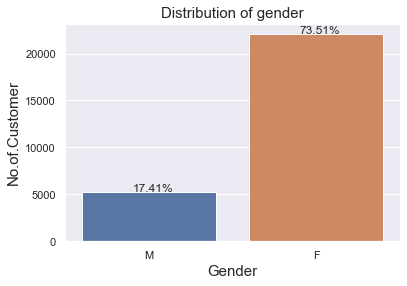

In [8]:
sns.countplot(data=raw_data, x ="Gender")

plt.title("Distribution of gender", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("No.of.Customer", fontsize=15)

plt.text(x=-0.1, y=raw_data.Gender.value_counts()[1]+20,
         s= str(round((raw_data.Gender.value_counts()[1])*100/len(raw_data.Gender),2))+"%")
plt.text(x= 0.9, y=raw_data.Gender.value_counts()[0]+20,
         s= str(round((raw_data.Gender.value_counts()[0])*100/len(raw_data.Gender),2))+"%")

plt.show()

In [10]:
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [11]:
raw_data.describe(include=object)

,Gender
count,27276
unique,2
top,F
freq,22054


In [12]:

Total = raw_data.isnull().sum().sort_values(ascending=False)

Percent = (raw_data.isnull().sum()/raw_data.isnull().count()*100).sort_values(ascending=False)

missing = pd.concat([Total, Percent], axis=1, keys=["Total", "Percentage"])

missing

,Total,Percentage
Gender,2724,9.08
J.M. Smucker,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00
LG,0,0.00
Dior,0,0.00


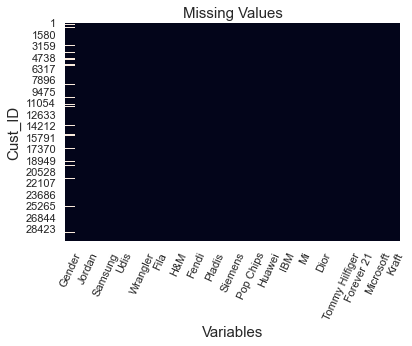

In [13]:
sns.heatmap(raw_data.isnull(), cbar=False)

plt.title("Missing Values", fontsize=15)
plt.xlabel("Variables", fontsize=15)
plt.ylabel("Cust_ID", fontsize=15)
plt.xticks(rotation=65)

plt.show()

In [14]:
data= pd.get_dummies(raw_data,columns=['Gender'])
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [15]:
data.shape

(30000, 38)

In [16]:
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

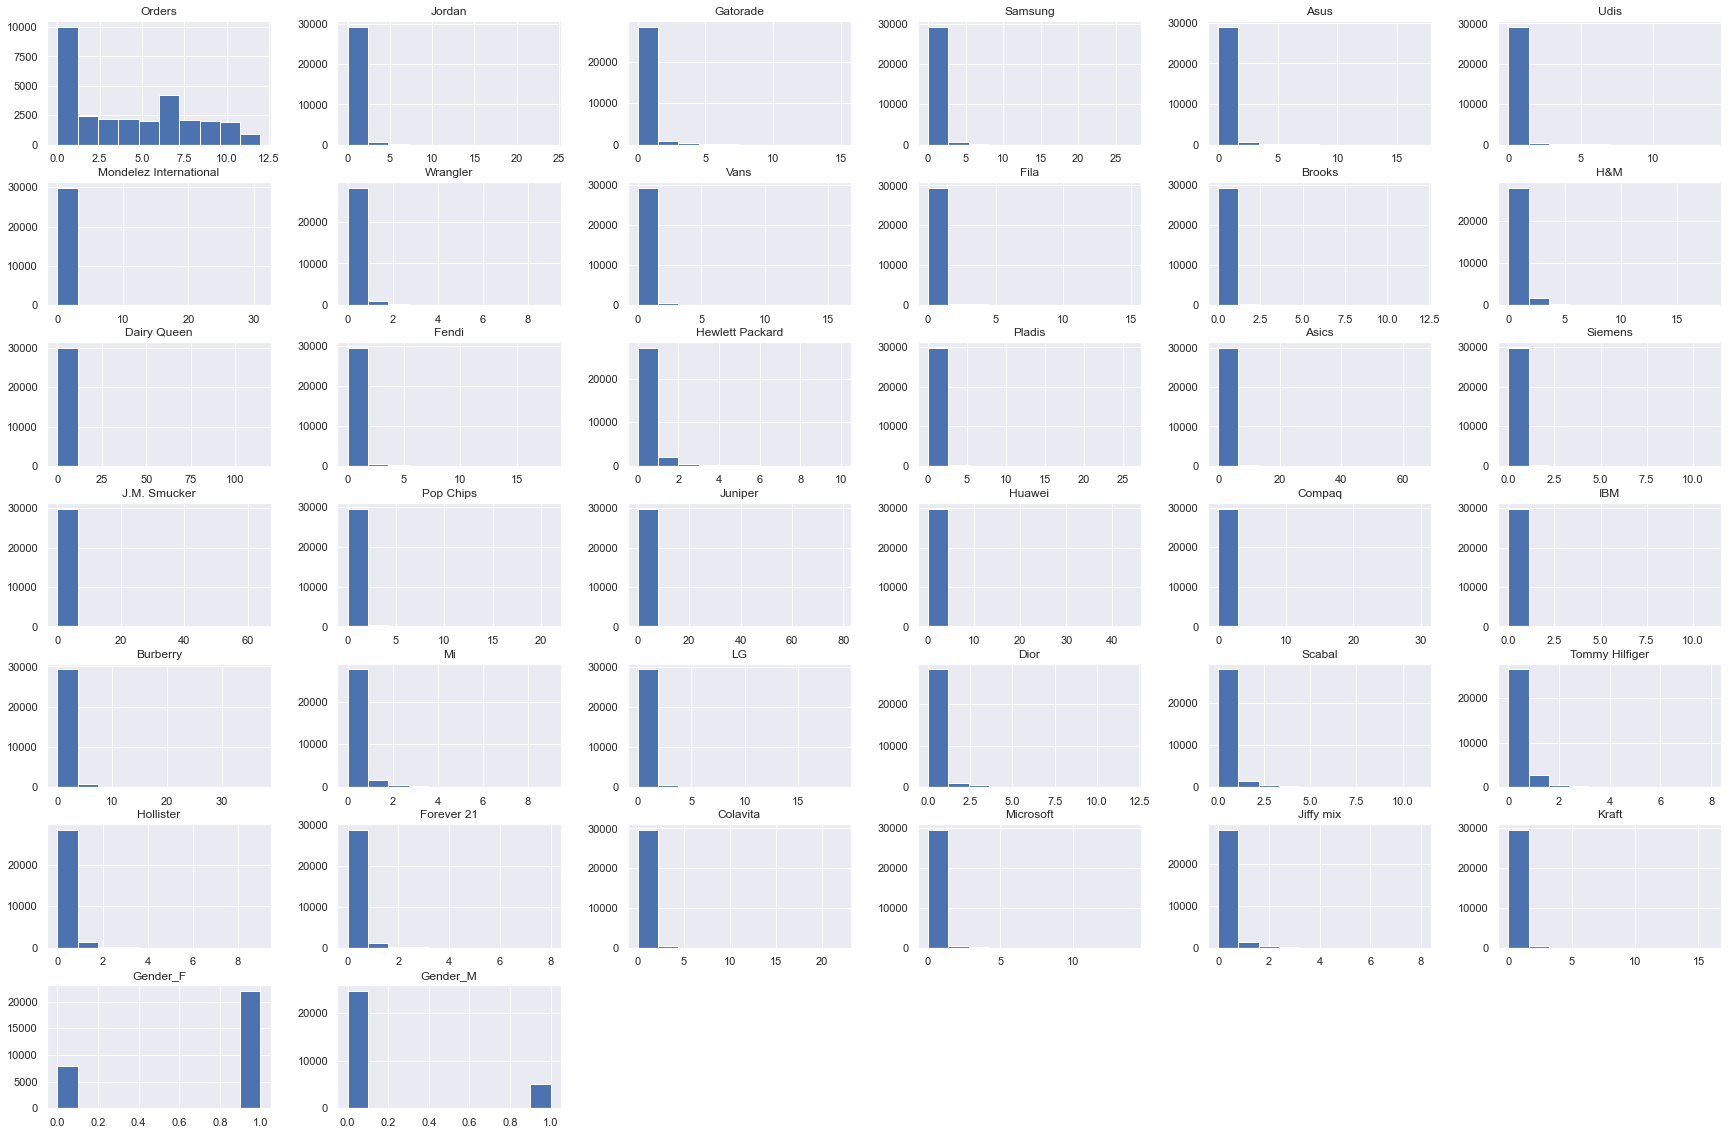

In [17]:
fig = data.hist(figsize=(30,20))

In [18]:
features = data.drop(["Orders", "Gender_F", "Gender_M"], axis=1)
features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler().fit(features)

features=scale.transform(features)

In [22]:
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [23]:
features_scaled = pd.DataFrame(features, columns=data.columns[1:36])
features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [4,5,6,7,8]

for K in n_clusters:
    cluster = KMeans(n_clusters=K, random_state=10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state=10)
    print("For n_clusters = {}, Silhouette_score is {}".format(K, score))

For n_clusters = 4, Silhouette_score is 0.28882936660509695
For n_clusters = 5, Silhouette_score is 0.2734507732644251
For n_clusters = 6, Silhouette_score is 0.21945733520583072
For n_clusters = 7, Silhouette_score is 0.2038118827349176
For n_clusters = 8, Silhouette_score is 0.19969011593383135


In [25]:
model = KMeans(n_clusters = 4, random_state=10)

model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

In [26]:
data_output = data.copy(deep=True)

data_output["Cluster"] = model.labels_

data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [27]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

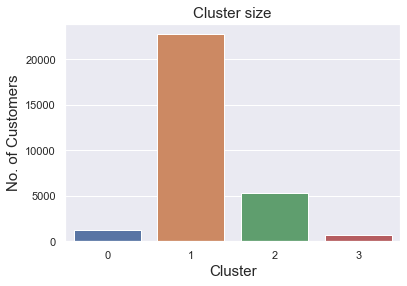

In [28]:
sns.countplot(data= data_output, x="Cluster")

plt.title("Cluster size", fontsize=15)
plt.xlabel("Cluster", fontsize=15)
plt.ylabel("No. of Customers", fontsize=15)

plt.show()

In [29]:
centers = pd.DataFrame(model.cluster_centers_, columns=data_output.columns[1:36])
centers

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


In [30]:
cluster_1 = sorted(zip(list(centers.iloc[0,:]),list(centers.columns)), reverse=True)[:10]

In [31]:
np.unique(model.labels_, return_counts=True)[1][2]

5272

In [32]:
cluster_var = pd.DataFrame(cluster_1)[1]
cluster_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [33]:
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster==0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


In [34]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse=True)[:10]

In [35]:
cluster_var2 = pd.DataFrame(cluster_2)[1]


In [36]:
cluster_var2

0                IBM
1               Fila
2    Hewlett Packard
3             Compaq
4              Fendi
5          Microsoft
6           Colavita
7               Vans
8          Jiffy mix
9              Kraft
Name: 1, dtype: object

In [43]:
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster==1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


In [37]:
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse=True)[:10]

In [38]:
cluster_var3 = pd.DataFrame(cluster_3)[1]

In [39]:
cluster_var3

0        Scabal
1        Jordan
2     Hollister
3      Gatorade
4          Dior
5           H&M
6    Forever 21
7          Udis
8        Huawei
9          Asus
Name: 1, dtype: object

In [44]:
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster==2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


In [40]:
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]

In [41]:
cluster_var4 = pd.DataFrame(cluster_4)[1]

In [42]:
cluster_var4

0                   Siemens
1                     Asics
2              J.M. Smucker
3                 Pop Chips
4                   Juniper
5                    Huawei
6                        Mi
7                    Compaq
8    Mondelez International
9                 Microsoft
Name: 1, dtype: object

In [45]:
data_output[["Orders", "Gender_F", "Gender_M", "Cluster"]][data_output.Cluster==3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0
